In [1]:
%matplotlib inline

In [2]:
import face_model
import face_train
import tensorflow as tf
import data_provider
import menpo.io as mio
import menpo
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.platform import tf_logging as logging
from utils import caffe_preprocess, rescale_image, frankotchellappa
import convert
from losses import smooth_l1

slim = tf.contrib.slim

In [3]:
nogpu_config = tf.ConfigProto(
    # Do not use a GPU device
    device_count = {'GPU': 0}
)
sess = tf.InteractiveSession(config=nogpu_config)

In [4]:
provider = data_provider.AFLW()
images, normals, segmentation = provider.get('normals', 'segmentation')

In [5]:
coord = tf.train.Coordinator()
tf.train.start_queue_runners(sess, coord)

[<Thread(Thread-4, started daemon 139808986863360)>,
 <Thread(Thread-5, started daemon 139808433239808)>,
 <Thread(Thread-6, started daemon 139808424847104)>,
 <Thread(Thread-7, started daemon 139808416454400)>]

In [6]:
with tf.variable_scope('net'):
    with slim.arg_scope([slim.layers.dropout], is_training=False):
        prediction, pyramid = face_model.multiscale_seg_net(images)

In [35]:
saver = tf.train.Saver()
model_path = slim.evaluation.tf_saver.get_checkpoint_state('ckpt/train').model_checkpoint_path
saver.restore(sess, model_path)

In [36]:
print(model_path)

ckpt/train/model.ckpt-425


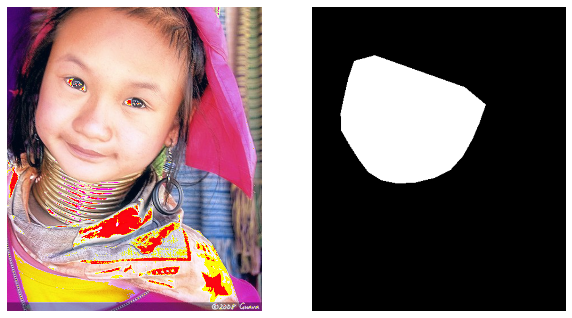

In [33]:
estimated_normals, image, seg = sess.run([prediction, images, segmentation])
image = image[0][..., [2, 1, 0]]
plt.subplot(1, 2, 1)
menpo.image.Image.init_from_channels_at_back((image - image.min())/255.).view()
plt.subplot(1, 2, 2)
menpo.image.Image.init_from_channels_at_back(seg[0]).view()

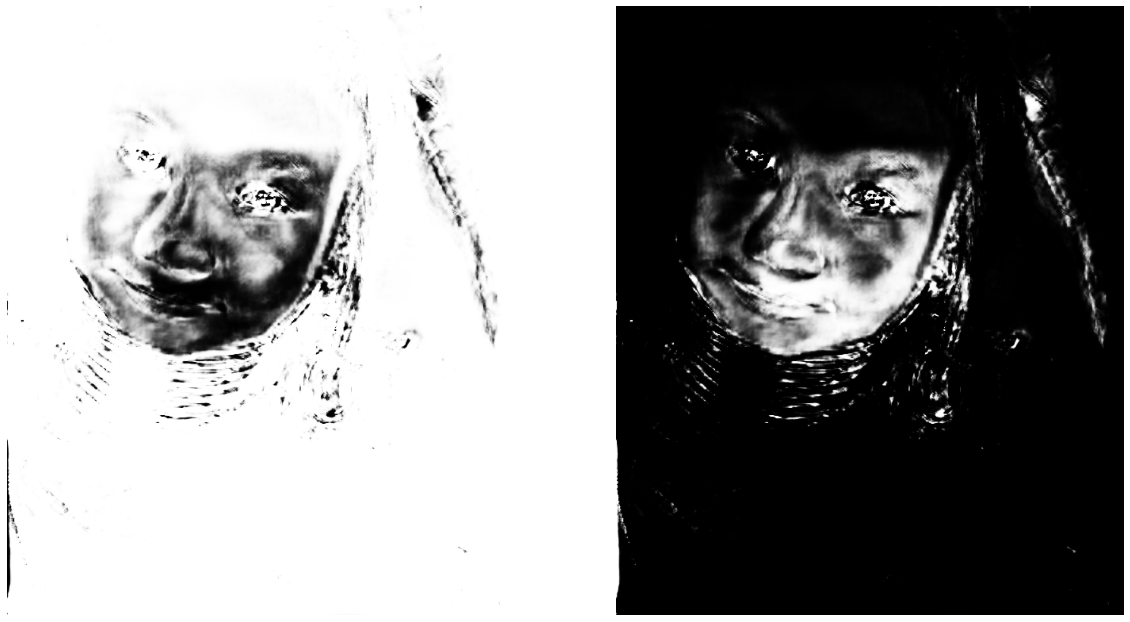

In [34]:
x = np.exp(estimated_normals[0]) / np.exp(estimated_normals[0]).sum(2)[..., None]
est_normals = menpo.image.Image.init_from_channels_at_back(x)
est_normals.view(channels='all', figure_size=(20, 20))

In [11]:
# est_depth = menpo.image.Image(frankotchellappa(-est_normals.pixels[0], est_normals.pixels[1]))

In [ ]:
menpo.image.Image(est_depth.pixels).view()